# Insurance Premium Prediction

### STEP-1 DATA COLLECTION

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### STEP-2 DATA PREPROCESSING

In [3]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- So no null values to be found.

### Peparing X and y variables 

In [4]:
X = df.drop(columns='charges')

In [5]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Unique Values of each categorical column

In [6]:
for each in X.select_dtypes('object').columns:
    print(f"unique values in {each} column: {X[each].unique()}")

unique values in sex column: ['female' 'male']
unique values in smoker column: ['yes' 'no']
unique values in region column: ['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
y = np.log(df['charges'])

In [8]:
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [9]:
# creating column transformer with 3 types of transformer

num_features = X.select_dtypes(exclude="object").columns
cate_features = X.select_dtypes(include="object").columns

# Importing Standard scaler, onehotencoder and ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

stdscaler = StandardScaler()
onehot_encode = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("Onehotencoder", onehot_encode, cate_features),
        ("StandardScaler", stdscaler, num_features),
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1338, 11)

In [12]:
# Transformed data
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.438764,-0.453320,-0.908614
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.509965,0.509621,-0.078767
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.797954,0.383307,1.580926
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.441948,-1.305531,-0.908614
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.513149,-0.292556,-0.908614


### STEP-3 DATA SMAPLING

In [13]:
# Importing data for train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1070, 11), (268, 11), (1070,), (268,))

### STEP-3 MODEL TRAINING

#### Model training and eavaluation

In [14]:
# Importing libraries for model trainnig and evaluation

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [15]:
def model_eval(actual, pred):
    r2 = r2_score(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = mean_squared_error(actual, pred, squared=False)
    mape = mean_absolute_percentage_error(actual, pred)
    return r2, mse, rmse, mape

In [16]:
# Dictionary of all the models
models_dict = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False)
}

In [17]:
# Code for model training and evaluation

model_name = []
model_tr_r2 = []
model_tr_mse = []
model_tr_rmse = []
model_tr_mape = []
model_tr_acc = []
model_ts_r2 = []
model_ts_mse = []
model_ts_rmse = []
model_ts_mape = []
model_ts_acc = []

for i in range(len(models_dict)):
    model = list(models_dict.values())[i]
    model.fit(X_train, y_train)
    
    # making prediction on both train and test
    tr_pred = model.predict(X_train)
    ts_pred = model.predict(X_test)
    
    # model evaluation
    tr_r2, tr_mse, tr_rmse, tr_mape = model_eval(y_train, tr_pred)
    model_tr_r2.append(tr_r2)
    model_tr_mse.append(tr_mse)
    model_tr_rmse.append(tr_rmse)
    model_tr_mape.append(tr_mape)
    model_tr_acc.append(100-(tr_mape*100))
    ts_r2, ts_mse, ts_rmse, ts_mape = model_eval(y_test, ts_pred)
    model_ts_r2.append(ts_r2)
    model_ts_mse.append(ts_mse)
    model_ts_rmse.append(ts_rmse)
    model_ts_mape.append(ts_mape)
    model_ts_acc.append(100-(ts_mape*100))   

    # printing the results
    print(f"Model: {list(models_dict.keys())[i]}")
    model_name.append(list(models_dict.keys())[i])
    print(35*'-')
    print(f"Training results: ")
    print(f"r2 score: {tr_r2}")
    print(f"mse score: {tr_mse}")
    print(f"rmse score: {tr_rmse}")
    print(f"mape score: {tr_mape}")
    print(f"Accuracy: {100-(tr_mape*100)}")
    print(35*'-')
    print("Test results: ")
    print(f"Training results: ")
    print(f"r2 score: {ts_r2}")
    print(f"mse score: {ts_mse}")
    print(f"rmse score: {ts_rmse}")
    print(f"mape score: {ts_mape}")
    print(f"Accuracy: {100-(ts_mape*100)}")
    
    print(35*"=")
    print("\n")

Model: LinearRegression
-----------------------------------
Training results: 
r2 score: 0.7649181849097904
mse score: 0.1968800143534608
rmse score: 0.44371163423270843
mape score: 0.030780374970964846
Accuracy: 96.92196250290351
-----------------------------------
Test results: 
Training results: 
r2 score: 0.7752823547657106
mse score: 0.19436199747120783
rmse score: 0.4408650558517967
mape score: 0.031147329476463134
Accuracy: 96.88526705235368


Model: Ridge
-----------------------------------
Training results: 
r2 score: 0.7649775951800273
mse score: 0.19683025850632097
rmse score: 0.44365556291600916
mape score: 0.03070100703455108
Accuracy: 96.92989929654489
-----------------------------------
Test results: 
Training results: 
r2 score: 0.7752708371474258
mse score: 0.19437195924921424
rmse score: 0.44087635369705896
mape score: 0.031108612532284623
Accuracy: 96.88913874677154


Model: Lasso
-----------------------------------
Training results: 
r2 score: 0.0
mse score: 0.83749

In [18]:
model_result_df = pd.DataFrame()
model_result_df['Model Name'] = model_name
model_result_df['Model Train r2'] = model_tr_r2
model_result_df['Model Train mse'] = model_tr_mse
model_result_df['Model Train rmse'] = model_tr_rmse
model_result_df['Model Train mape'] = model_tr_mape
model_result_df['Model Train acc'] = model_tr_acc
model_result_df['Model Test r2'] = model_ts_r2
model_result_df['Model Test mse'] = model_ts_mse
model_result_df['Model Test rmse'] = model_ts_rmse
model_result_df['Model Test mape'] = model_ts_mape
model_result_df['Model Test acc'] = model_ts_acc

In [19]:
model_result_df.sort_values('Model Test acc', ascending=False)

,Model Name,Model Train r2,Model Train mse,Model Train rmse,Model Train mape,Model Train acc,Model Test r2,Model Test mse,Model Test rmse,Model Test mape,Model Test acc
6,SVR,0.841238,0.132963,0.364641,0.017120,98.287994,0.843165,0.135649,0.368305,0.018602,98.139808
4,RandomForestRegressor,0.969534,0.025515,0.159734,0.008563,99.143712,0.829878,0.147141,0.383590,0.021204,97.879604
3,DecisionTreeRegressor,0.994523,0.004587,0.067730,0.000486,99.951377,0.751395,0.215023,0.463705,0.022659,97.734106
8,CatBoostRegressor,0.952201,0.040031,0.200078,0.011677,98.832294,0.812883,0.161841,0.402294,0.023450,97.654965
7,XGBRegressor,0.991147,0.007415,0.086108,0.004060,99.594022,0.778691,0.191414,0.437509,0.027103,97.289729
1,Ridge,0.764978,0.196830,0.443656,0.030701,96.929899,0.775271,0.194372,0.440876,0.031109,96.889139
0,LinearRegression,0.764918,0.196880,0.443712,0.030780,96.921963,0.775282,0.194362,0.440865,0.031147,96.885267
5,AdaBoostRegressor,0.791464,0.174648,0.417909,0.033230,96.677001,0.774135,0.195355,0.441990,0.036789,96.321128
2,Lasso,0.000000,0.837496,0.915148,0.082828,91.717201,-0.013787,0.876841,0.936398,0.086574,91.342593


In [20]:
# Import libraries for ploting

import matplotlib.pyplot as plt
import seaborn as sns

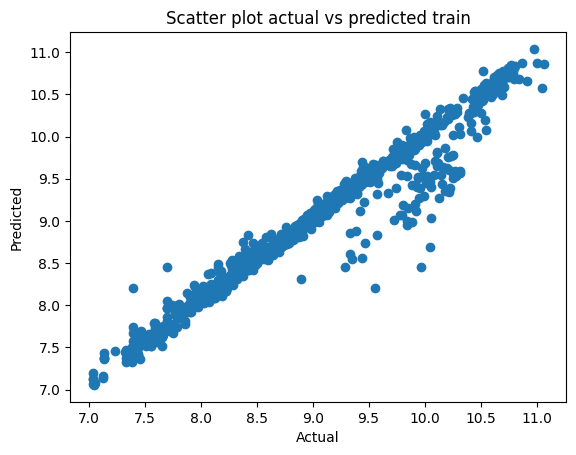

In [21]:
plt.scatter(x=y_train, y=tr_pred)
plt.title("Scatter plot actual vs predicted train")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

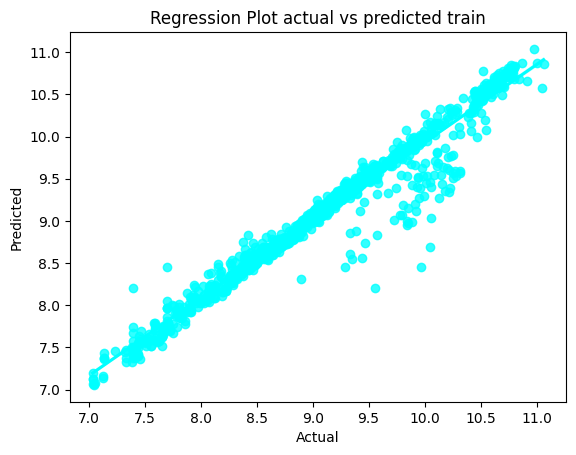

In [22]:
sns.regplot(x=y_train, y=tr_pred, color='cyan')
plt.title("Regression Plot actual vs predicted train")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Conclusion
- At first before we did log transformation non of the models where performing good.
- But after log transformation all the models perfomance increased drastically.
- We have choose the SVR model on the bases of accuracy on the test data, which also the best perfoming among all the models on test data.
- After we do our prediction we will do anti log for getting the actual primium that customer has to pay according to their inputs.